# Roteiro



In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import csv
import urllib
import io
import requests
import pickle

import datetime
import scipy.stats as scs
import statsmodels.stats.stattools as smstools

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
py.init_notebook_mode(connected=True)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Manipulacao de dados

Fonte: Arquivo *dados.pdf*

## 0.1. Helper functions

In [2]:
# Adaptado de: Stock_Download-data.ipynb
def plotscatter(df, columns=None, name='Stock name', title='Stock price', yaxis='Preco'):
    if columns is None: columns=df.columns
        
    # 1) Traces
    df_data = list(go.Scatter(x=df.index, y=df[col], name=col) for col in columns)

    # 2) Layout
    df_layout = go.Layout(title=title, legend={'orientation':'h'}, yaxis={'title':yaxis})

    # 3) Figure
    df_fig = go.Figure(data=df_data, layout=df_layout)
    py.iplot(df_fig)

In [3]:
def dados_do_trabalho(url, file_name):
    '''Le/baixa dados do trabalho 1 de Financas Quantitativas'''
    save_path = '{}.pkl'.format(file_name)
    try:
        with open(save_path, 'rb') as f:
            df = pickle.load(f)
            print(f'Dados lidos de {save_path}')
    except (OSError, IOError) as e:
        print('Baixando dados de {}'.format(url))
        s = requests.get(url).content
        df = pd.read_csv(io.StringIO(s.decode('utf-8')))
        df.to_pickle(save_path)
        print(f'Salvo em {save_path}')
        
    return df

## 0.2. Download dos dados

In [4]:
df_raw_daily = dados_do_trabalho("http://www.dcc.ufmg.br/~arbex/portfolios/IBOV.csv", 'ibov_diario')
df_raw_monthly = dados_do_trabalho("http://www.dcc.ufmg.br/~arbex/portfolios/IBOVmensal.csv", 'ibov_mensal')

Dados lidos de ibov_diario.pkl
Dados lidos de ibov_mensal.pkl


## 0.3. Propriedades do data frame

In [5]:
print(df_raw_daily.shape, '\n')
print(df_raw_daily.columns, '\n')
print(df_raw_daily.index, '\n')
df_raw_daily.tail()

(2759, 65) 

Index(['Date', 'IBOV', 'BOVA11', 'ABEV3', 'BVMF3', 'BBDC3', 'BBAS3', 'SANB11',
       'BBSE3', 'BRML3', 'BBDC4', 'BRAP4', 'BRKM5', 'BRFS3', 'CCRO3', 'ELET6',
       'CIEL3', 'PCAR4', 'SBSP3', 'CMIG4', 'CPLE6', 'CSNA3', 'CSAN3', 'CPFE3',
       'CYRE3', 'ECOR3', 'ENBR3', 'EMBR3', 'EGIE3', 'EQTL3', 'ESTC3', 'FIBR3',
       'FLRY3', 'GGBR4', 'HYPE3', 'IGTA3', 'ITUB4', 'ITSA4', 'JBSS3', 'KLBN11',
       'KROT3', 'RENT3', 'LAME4', 'LREN3', 'MGLU3', 'MRFG3', 'GOAU4', 'MRVE3',
       'MULT3', 'NATU3', 'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'SAPR11',
       'SMLS3', 'SUZB3', 'VIVT4', 'TIMP3', 'TAEE11', 'UGPA3', 'USIM5', 'VALE3',
       'VVAR11'],
      dtype='object') 

RangeIndex(start=0, stop=2759, step=1) 



,Date,IBOV,BOVA11,ABEV3,BVMF3,BBDC3,BBAS3,SANB11,BBSE3,BRML3,...,SAPR11,SMLS3,SUZB3,VIVT4,TIMP3,TAEE11,UGPA3,USIM5,VALE3,VVAR11
2754,20180223,87293.24,84.29,21.97,27.01,38.32,42.08,38.07,29.75,12.33,...,54.55,82.39,22.15,52.30,14.23,21.01,12.20,45.56,28.00,23.77
2755,20180226,87652.64,84.72,22.15,27.21,38.24,42.69,38.25,29.60,12.42,...,54.46,83.09,21.59,52.42,14.35,21.40,12.75,46.87,28.34,24.07
2756,20180227,86935.44,84.09,22.22,26.50,37.98,42.27,37.88,29.31,12.07,...,53.43,82.50,21.46,51.54,14.11,21.18,12.65,46.80,27.66,23.72
2757,20180228,85353.60,82.50,22.00,25.62,36.81,41.48,36.77,29.10,11.93,...,53.50,84.28,21.75,50.65,14.10,20.50,12.32,44.54,27.39,23.33
2758,20180301,85377.79,82.52,22.34,25.59,37.09,41.78,36.57,29.21,11.73,...,53.30,84.80,21.26,51.88,14.03,20.45,11.80,43.95,28.18,23.20


In [6]:
print(df_raw_monthly.shape, '\n')
print(df_raw_monthly.columns, '\n')
print(df_raw_monthly.index, '\n')
df_raw_monthly.tail()

(135, 65) 

Index(['Date', 'IBOV', 'ABEV3', 'BVMF3', 'BBDC3', 'BBAS3', 'SANB11', 'BBSE3',
       'BOVA11', 'BRML3', 'BBDC4', 'BRAP4', 'BRKM5', 'BRFS3', 'CCRO3', 'ELET6',
       'CIEL3', 'PCAR4', 'SBSP3', 'CMIG4', 'CPLE6', 'CSNA3', 'CSAN3', 'CPFE3',
       'CYRE3', 'ECOR3', 'ENBR3', 'EMBR3', 'EGIE3', 'EQTL3', 'ESTC3', 'FIBR3',
       'FLRY3', 'GGBR4', 'HYPE3', 'IGTA3', 'ITUB4', 'ITSA4', 'JBSS3', 'KLBN11',
       'KROT3', 'RENT3', 'LAME4', 'LREN3', 'MGLU3', 'MRFG3', 'GOAU4', 'MRVE3',
       'MULT3', 'NATU3', 'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'SAPR11',
       'SMLS3', 'SUZB3', 'VIVT4', 'TIMP3', 'TAEE11', 'UGPA3', 'USIM5', 'VALE3',
       'VVAR11'],
      dtype='object') 

RangeIndex(start=0, stop=135, step=1) 



,Date,IBOV,ABEV3,BVMF3,BBDC3,BBAS3,SANB11,BBSE3,BOVA11,BRML3,...,SAPR11,SMLS3,SUZB3,VIVT4,TIMP3,TAEE11,UGPA3,USIM5,VALE3,VVAR11
130,201711,71970.99,20.19,22.97,29.59,29.62,27.78,26.05,69.40,12.09,...,51.58,74.95,17.51,46.62,11.80,21.00,8.56,34.38,21.77,22.74
131,201712,76402.08,21.21,22.78,32.01,31.58,30.65,27.61,73.82,12.73,...,58.30,75.90,18.69,48.62,13.10,21.34,9.10,39.81,24.47,24.02
132,201801,84912.70,21.88,26.08,39.29,39.38,35.84,30.15,82.00,12.85,...,58.11,82.15,20.66,53.85,13.50,20.15,11.86,40.98,27.12,23.62
133,201802,85353.60,22.00,25.62,36.81,41.48,36.77,29.10,82.50,11.93,...,53.50,84.28,21.75,50.65,14.10,20.50,12.32,44.54,27.39,23.33
134,201803,85377.79,22.34,25.59,37.09,41.78,36.57,29.21,82.52,11.73,...,53.30,84.80,21.26,51.88,14.03,20.45,11.80,43.95,28.18,23.20


## 0.4. Transformacao de indices para datas

In [7]:
df_diario = df_raw_daily.copy() # faz copia do original
df_mensal = df_raw_monthly.copy()

In [8]:
# Funcao que transforma data em formato inteiro em tipo datetime
dayint2date = lambda date_int: pd.to_datetime(date_int, format='%Y%m%d')
monint2date = lambda date_int: pd.to_datetime(date_int, format='%Y%m')

# Aplica na coluna 'Date'
df_diario['Date'] = df_diario['Date'].apply(dayint2date)
df_mensal['Date'] = df_mensal['Date'].apply(monint2date)

# Seta os indices para ser a coluna 'Date'
df_diario = df_diario.set_index('Date')
df_mensal = df_mensal.set_index('Date')

In [9]:
print(df_diario.head())
print(df_mensal.head())

                IBOV  BOVA11  ABEV3  BVMF3  BBDC3  BBAS3  SANB11  BBSE3  \
Date                                                                      
2007-01-02  45382.61     0.0   2.68    0.0   9.82  11.05     0.0    0.0   
2007-01-03  44445.29     0.0   2.66    0.0   9.71  10.85     0.0    0.0   
2007-01-04  44019.77     0.0   2.66    0.0   9.75  11.25     0.0    0.0   
2007-01-05  42245.16     0.0   2.61    0.0   9.35  10.76     0.0    0.0   
2007-01-08  42829.93     0.0   2.66    0.0   9.65  11.01     0.0    0.0   

            BRML3  BBDC4   ...    SAPR11  SMLS3  SUZB3  VIVT4  TIMP3  TAEE11  \
Date                       ...                                                 
2007-01-02    0.0  10.34   ...       0.0    0.0    0.0  22.07   9.84    2.59   
2007-01-03    0.0  10.27   ...       0.0    0.0    0.0  22.20   9.46    2.68   
2007-01-04    0.0  10.29   ...       0.0    0.0    0.0  22.32   9.04    2.65   
2007-01-05    0.0   9.86   ...       0.0    0.0    0.0  21.34   8.68    2.

## 0.5. Presenca de zeros

In [10]:
df_diario = df_diario.replace(0, np.nan) # troca 0 por nan
df_mensal = df_mensal.replace(0, np.nan) # troca 0 por nan

In [12]:
print(df_diario['BOVA11'][df_diario['BOVA11']>56].count(), '\n') # numero de elementos do BOVA11 com valor maior que 56
print(df_diario.count(axis=0)) # conta numero de elementos que nao sao NaN

1145 

IBOV      2759
BOVA11    2284
ABEV3     2759
BVMF3     2357
BBDC3     2759
BBAS3     2759
SANB11    2075
BBSE3     1198
BRML3     2695
BBDC4     2759
BRAP4     2759
BRKM5     2759
BRFS3     2759
CCRO3     2759
ELET6     2759
CIEL3     2145
PCAR4     2759
SBSP3     2759
CMIG4     2759
CPLE6     2759
CSNA3     2759
CSAN3     2759
CPFE3     2759
CYRE3     2759
ECOR3     1959
ENBR3     2759
EMBR3     2759
EGIE3     2759
EQTL3     2450
ESTC3     2385
          ... 
IGTA3     2734
ITUB4     2759
ITSA4     2759
JBSS3     2700
KLBN11    1014
KROT3     2622
RENT3     2759
LAME4     2759
LREN3     2759
MGLU3     1692
MRFG3     2637
GOAU4     2759
MRVE3     2622
MULT3     2618
NATU3     2759
PETR3     2759
PETR4     2759
QUAL3     1651
RADL3     2758
RAIL3     2759
SAPR11      66
SMLS3     1198
SUZB3       72
VIVT4     2759
TIMP3     2759
TAEE11    2759
UGPA3     2759
USIM5     2759
VALE3     1038
VVAR11    2751
Length: 64, dtype: int64


In [13]:
df_nozerolines = df_diario.dropna(axis=0, how='any') # linhas sem NaNs
print(df_nozerolines.head())

                IBOV  BOVA11  ABEV3  BVMF3  BBDC3  BBAS3  SANB11  BBSE3  \
Date                                                                      
2017-11-22  74518.79   71.90  20.46  24.20  30.78  32.40   29.36  26.74   
2017-11-23  74486.58   71.93  20.34  24.18  30.57  32.44   29.06  26.47   
2017-11-24  74157.37   71.63  20.25  24.01  30.20  32.26   29.30  26.31   
2017-11-27  74058.92   71.59  20.37  23.98  30.39  31.83   29.15  26.14   
2017-11-28  74139.72   71.86  20.41  23.97  30.25  32.30   28.74  26.16   

            BRML3  BBDC4   ...    SAPR11  SMLS3  SUZB3  VIVT4  TIMP3  TAEE11  \
Date                       ...                                                 
2017-11-22  12.39  33.10   ...     58.86  80.23  19.60  48.28  12.10   20.38   
2017-11-23  12.42  32.86   ...     58.39  82.18  19.32  48.00  12.40   20.43   
2017-11-24  12.61  32.57   ...     58.01  83.16  19.15  47.57  12.27   20.87   
2017-11-27  12.75  32.52   ...     57.42  82.95  18.94  48.16  12.31   21.

## 0.6. IBOV vs. BOVA11

In [14]:
# Faz uma copia so com os indices
df_temp = df_diario[['IBOV','BOVA11']].copy()

# Seleciona a partir de 2009
df_temp = df_temp.loc['2009-01-01':]

# Obs.: caso se queira descobrir os indices das linhas em que estao os valores selecionados, pode-se utilizar
# df_temp[df_temp['Date']>=20090101].index.values.astype(int)[0] # retorna primeiro indice valido como int (com df_raw)

# Normaliza as colunas entre 0 e 1
min_max_scaler = preprocessing.MinMaxScaler()
norm_values = min_max_scaler.fit_transform(df_temp[['IBOV','BOVA11']].values.astype(float))
df_temp.update(pd.DataFrame(data=norm_values, columns=['IBOV','BOVA11'], index=df_temp.index))

plotscatter(df_temp, columns=['IBOV', 'BOVA11'], title='IBOVA vs. BOVA11', yaxis='Preco normalizado')

## 0.7. Exemplo: eliminar colunas com precos invalidos no ano de 2010

In [15]:
df_example = df_diario.copy()

df_example = df_example.loc['2010'] # seleciona indices do ano de 2010

df_example = df_example.dropna(axis=1, how='any') # elimina colunas que tenham QUAISQUER valores = NaN
# df_example = df_example.dropna(axis=1, how='all') # elimina colunas que tenham TODOS os valores = NaN

df_example.describe()

,IBOV,BOVA11,ABEV3,BVMF3,BBDC3,BBAS3,SANB11,BRML3,BBDC4,BRAP4,...,PETR3,PETR4,RADL3,RAIL3,VIVT4,TIMP3,TAEE11,UGPA3,USIM5,VVAR11
count,247.000000,247.000000,247.000000,247.000000,247.00000,247.000000,247.000000,247.000000,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,67258.101498,66.735101,5.042874,9.234858,11.48915,17.865830,12.174939,7.802105,14.109514,25.875709,...,29.537085,24.719028,10.772024,53.557045,21.814453,5.939879,4.205628,22.689312,36.752227,5.967692
std,3041.267280,2.997543,0.707245,0.829795,0.91605,1.510971,0.962514,1.342240,1.333169,2.480388,...,3.642983,3.025909,2.050299,3.564188,1.475469,0.334605,0.491825,2.797256,2.890091,0.683009
min,58192.080000,57.980000,4.170000,7.490000,9.73000,14.780000,10.230000,6.130000,11.780000,20.460000,...,23.730000,20.280000,7.720000,44.210000,18.690000,4.790000,2.970000,17.480000,30.570000,4.950000
25%,65150.905000,64.800000,4.495000,8.550000,10.82000,16.915000,11.575000,6.655000,13.105000,24.020000,...,26.665000,22.245000,8.835000,51.135000,20.770000,5.805000,3.990000,20.820000,34.395000,5.500000
50%,67814.700000,67.300000,4.810000,9.150000,11.33000,17.600000,12.200000,7.270000,13.800000,25.730000,...,28.300000,23.320000,10.640000,53.620000,21.510000,5.980000,4.150000,22.300000,36.600000,5.720000
75%,69578.330000,68.970000,5.350000,9.780000,12.12000,18.790000,12.765000,8.830000,15.090000,27.985000,...,33.280000,27.920000,12.830000,55.720000,23.250000,6.140000,4.740000,24.260000,39.125000,6.075000
max,72995.690000,72.400000,6.770000,11.490000,13.60000,21.280000,14.600000,10.570000,17.140000,30.510000,...,36.480000,30.810000,15.350000,64.260000,24.450000,6.800000,4.870000,29.760000,42.400000,7.670000


# <span style='color:darkmagenta'>Questao 1.</span> 

### Considere os dados da Bovespa mensais

### a. Qual o retorno e o log-retorno do ativo BOVA11 em Janeiro de 2018?

Retorno:<br><br> $$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $$
<br>
Log-retorno:<br><br> $$ r_t = ln \left( \frac{P_t}{P_{t-1}} \right)$$

In [16]:
P_t = df_mensal.loc['2018-01-01','BOVA11']   # preco em janeiro-2018
P_t_1 = df_mensal.loc['2017-12-01','BOVA11'] # preco em dezembro-2017
R_t = (P_t/P_t_1) - 1                        # retorno
r_t = np.log(P_t/P_t_1)                      # log-retorno

print('Retorno do ativo BOVA11 em Janeiro de 2018: {0:.2f}%'.format(R_t*100))
print('Log-retorno do ativo BOVA11 em Janeiro de 2018: {0:.4f}'.format(r_t))

Retorno do ativo BOVA11 em Janeiro de 2018: 11.08%
Log-retorno do ativo BOVA11 em Janeiro de 2018: 0.1051


### b. Se o BOVA11 mantiver este mesmo retorno em todos os meses do ano, quais serao os retornos e log-retornos anuais? Se investirmos RS1000 neste ativo, qual ser´a o valor final do investimento caso o retorno em Janeiro de 2018 se repita em todos os meses?

In [17]:
R_a = (1+R_t)**12 - 1  # taxa de retorno anualizada
r_a = 12*r_t           # log-retorno anualizado
print('Retorno anualizado do ativo BOVA11 (base: Jan-2018): {0:.2f}%'.format(R_a*100))
print('Log-retorno anualizado do ativo BOVA11 (base: Jan-2018): {0:.5f}'.format(r_a))

Retorno anualizado do ativo BOVA11 (base: Jan-2018): 252.92%
Log-retorno anualizado do ativo BOVA11 (base: Jan-2018): 1.26107


### c. Suponha que voce dividiu RS5000 igualmente, ao final de Dezembro de 2017, entre todas as acoes do indice IBOV. Qual o valor deste portfolio ao final de Marco, 2018? Suponha uma taxa livre de risco de 0.5% ao mes. Qual o retorno em excesso anualizado deste portfolio?

#### Primeira parte:
\begin{align*} 
    V_{mar} &= V_{dez}\cdot(1+R_{p,mar}) \tag{Valor em marco} \\
    R_{p,mar} &= \sum_{i=1}^{n}w_iR_{i,mar} \tag{Taxa de retorno}\\
    R_{i,mar} &= \frac{P_{i,mar}}{P_{i,dez}} - 1 \tag{Taxa de retorno individual da acao $i$}\\
    \sum_{i=1}^{n}w_i &= 1  \tag{Participacao de cada acao}
\end{align*}

#### Segunda parte:
\begin{align*}
    R_{p,a} &= (1+R_{p,mar})^{4} - 1 \tag{Taxa de retorno anualizada} \\
    R_a^* &= (1+R_m^* )^{12} - 1 = (1 + 0.005)^{12} - 1 \tag{Taxa de retorno anualizada} \\
    R_{p,exc} &= R_{p,a} - R_a^* \tag{Retorno em excesso} \\
\end{align*}

In [18]:
# Valor ao final de marco do portfolio
V_dez = 5000
R_i_mar = (df_mensal.loc['2018-03-01']/df_mensal.loc['2017-12-01']) - 1 # retornos individuais de 2017-12 a 2018-03
R_p_mar = np.mean(R_i_mar) # divisao igual -> taxa de retorno = media dos retornos
V_mar = V_dez*(1 + R_p_mar)
print('Valor do portfolio ao final de marco-2018: R${:.2f}'.format(V_mar))

R_p_a = (1 + R_p_mar)**4 - 1
R_m_ref = 0.005 # taxa livre de risco
R_a_ref = (1 + R_m_ref)**12 - 1
R_p_exc = R_p_a - R_a_ref
print('Retorno em excesso anualizado do portfolio: {:.2f}%'.format(R_p_exc*100))

Valor do portfolio ao final de marco-2018: R$5392.51
Retorno em excesso anualizado do portfolio: 29.13%


### d. De um exemplo de quando faz mais sentido utilizar retornos que log-retornos.

#### Resposta
Quando se está gerenciando um portfólio. Neste caso, a propriedade de agregação entre ativos, ou seja, poder calcular o retorno simples total como uma soma ponderada dos retornos simples individuais, é vantajosa quando comparada com o uso de log-retornos. 

# <span style='color:darkmagenta'>Questao 2.</span>

### Considere uma acao cujo preco atual e RS100. Analistas financeiros concluiram que ha duas possibilidades de preco ao final do proximo mes: RS105 e RS95, ambos cenarios com probabilidade de 50%. Existe a possibilidade de comprar uma opcao de compra desta acao com preco de exercicio de RS102 ao final do mes. Atualmente a opcao custa RS1.60.

### a. Considerando uma taxa livre de risco de 1% ao mes, voce compraria esta opcao? Por que?

In [19]:
# Valor esperado do investimento:
Ganho_cen1 = 105-102-1.6 # cenario 1: A acao valoriza para R$105
Ganho_cen2 = -1.6        # cenario 1: A acao desvaloriza para R$95
Ganho_esperado = 0.5*Ganho_cen1 + 0.5*Ganho_cen2

print('Ganho esperado: R${:.2f}'.format(Ganho_esperado))

Ganho esperado: R$-0.10


#### Resposta:

Eu não compraria esta opção, pois o ganho esperado é negativo, i.e., é mais provável que se perca dinheiro do que se ganhe com esta transação.

### b. Se a taxa de livre de risco for 0% sua decisao mudaria?

#### Resposta:

Não, pois o cálculo anterior sequer considerou a taxa livre de risco.

# <span style='color:darkmagenta'>Questao 3.</span>

### O teste de Jarque-Bera e geralmente utilizado para testar a hipotese de que uma serie de dados possui uma distribuicao normal. Calcula-se a estatistica de teste:

$$ JB = N \left[ \frac{\hat{\gamma}}{6} + \frac{(\hat{\kappa} - 3)^2}{24}  \right] $$

- $N$: tamanho da amostra
- $\hat{\gamma}$: estimativa de assimetria (*skewness*)
- $\hat{\kappa}$: estimativa de curtose (*kurtosis*)

### Compara-se a estatistica acima com a distribuicao $\chi^2$ com $k=2$ graus de liberdade.

#### Observacoes
- **Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
- **Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case. 
- "A normal distribution has a skew of zero (i.e. it’s perfectly symmetrical around the mean) and a kurtosis of three; kurtosis tells you how much data is in the tails and gives you an idea about how 'peaked' the distribution is. It’s not necessary to know the mean or the standard deviation for the data in order to run the test." - *notar que isto explica os numeradores*
- Jarque-Bera e' comumente utilizado com data sets grandes, pois **Shapiro-Wilk** aparentemente nao e' confiavel para $n > 2000$.

#### Referencias
- http://www.statisticshowto.com/jarque-bera-test/
- https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test

Ver tambem
- https://en.wikipedia.org/wiki/Goodness_of_fit
- https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

### Considerando os dados disponibilizados, os retornos diarios da PETR4 possuem distribuicao normal? E os retornos mensais? Quais os p-values em ambos os casos?

#### Observacao
Para os valores mensais, sera utilizado o teste de Shapiro-Wilk, o qual e' recomendado quando o numero de amostras e' < 2000.

In [20]:
petr4_dia = df_diario['PETR4']
petr4_mes = df_mensal['PETR4']

In [21]:
ret_petr4_dia = pd.Series(data = petr4_dia.iloc[1:].values / petr4_dia.iloc[:-1].values - 1, 
                          index = petr4_dia.index[1:]
                         )

ret_petr4_mes = pd.Series(data = petr4_mes.iloc[1:].values / petr4_mes.iloc[:-1].values - 1, 
                          index = petr4_mes.index[1:]
                         )

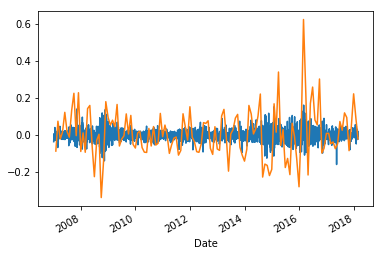

In [22]:
ret_petr4_dia.plot()
ret_petr4_mes.plot()

In [23]:
def teste_jarque_bera(dados):
    jb, p_val, sk, kurt = smstools.jarque_bera(dados)
    print('\n-----------------------------------------------------')
    print('HIPOTESE NULA:')
    print('\t Os dados foram amostrados de uma distribuicao normal')
    print('-----------------------------------------------------')
    print('RESULTADOS:')
    print('\t Estatistica do teste: {:.2f}'.format(jb))
    print('\t P-value do teste: {:.4f}'.format(p_val))
    print('\t Assimetria estimada: {:.4f}'.format(sk))
    print('\t Curtose estimada: {:.4f}'.format(kurt))
    print('-----------------------------------------------------')

    print('CONCLUSA0:')
    if p_val < 0.05:
        print('\t Hipotese Nula REJEITADA: os dados nao sao normalmente distribuidos')
    else:
        print('\t Hipotese Nula NAO REJEITADA: dados possivelmente normalmente distribuidos')

In [24]:
print('Teste de Jarque-Bera para retornos diarios da PETR4')
teste_jarque_bera(ret_petr4_dia.values)

Teste de Jarque-Bera para retornos diarios da PETR4

-----------------------------------------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
-----------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 1284.15
	 P-value do teste: 0.0000
	 Assimetria estimada: 0.1910
	 Curtose estimada: 6.3209
-----------------------------------------------------
CONCLUSA0:
	 Hipotese Nula REJEITADA: os dados nao sao normalmente distribuidos


In [25]:
def teste_shapiro_wilk(dados):
    sw, p_val = scs.shapiro(dados)
    print('\n-----------------------------------------------------')
    print('HIPOTESE NULA:')
    print('\t Os dados foram amostrados de uma distribuicao normal')
    print('-----------------------------------------------------')
    print('RESULTADOS:')
    print('\t Estatistica do teste: {:.4f}'.format(sw))
    print('\t P-value do teste: {:.4f}'.format(p_val))
    print('-----------------------------------------------------')

    print('CONCLUSA0:')
    if p_val < 0.05:
        print('\t Hipotese Nula REJEITADA: os dados nao sao normalmente distribuidos')
    else:
        print('\t Hipotese Nula NAO REJEITADA: dados possivelmente normalmente distribuidos')

In [26]:
print('Teste de Shapiro-Wilk para retornos mensais da PETR4')
teste_shapiro_wilk(ret_petr4_mes.values)

Teste de Shapiro-Wilk para retornos mensais da PETR4

-----------------------------------------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
-----------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 0.9617
	 P-value do teste: 0.0008
-----------------------------------------------------
CONCLUSA0:
	 Hipotese Nula REJEITADA: os dados nao sao normalmente distribuidos


# <span style='color:darkmagenta'>Questao 4.</span>

### Considere um portfolio com duas acoes. O portfolio possui RS2000 investido na acao A e RS4000 investido na acao B. Assuma que ambas as acoes possuem retorno esperado zero e considere a seguinte matriz de covariancia:

$$\Sigma = \left[ \begin{array}{cc}
                0.1^2 & 0 \\
                0 & 0.06^2
           \end{array}\right]
$$

### Considere que os retornos de ambas as acoes sao governados por distribuicoes normais.

### a. A distribuicao do portfolio e' normal?

#### Resposta:
Os retornos das ações A e B são independentes, pois $\sigma_{A,B} = \sigma_{B,A} = 0$. Logo, a função densidade de probabilidade para um par de retornos $(a,b)$ é

\begin{equation}
    P(a,b) = P(a)P(b) = \frac{1}{\sigma_A \sqrt{2\pi}}e^{-\frac{(a-\mu_A)^2}{2\sigma_A^2}} \cdot 
                        \frac{1}{\sigma_B \sqrt{2\pi}}e^{-\frac{(a-\mu_B)^2}{2\sigma_B^2}}
                      = \frac{1}{2\pi\sigma_A\sigma_B}e^{-\left(\frac{(a-\mu_A)^2}{2\sigma_A^2} + \frac{(a-\mu_B)^2}{2\sigma_B^2}\right)} \tag{1}
\end{equation}

A função geral de densidade de probabilidade para uma distribuição normal bivariada é
\begin{equation}
    P(a,b) = \frac{1}{2\pi\sigma_A\sigma_B \sqrt{(1-\rho^2)}}  e^{-\left(\frac{(a-\mu_A)^2}{2\sigma_A^2} - \frac{2\rho(a-\mu_A)(b-\mu_B)}{\sigma_A \sigma_B}+ \frac{(a-\mu_B)^2}{2\sigma_B^2}\right)} \tag{2}
\end{equation}

Na qual $\rho$ é a correlação entre A e B.

Como sabemos, a covariância entre A e B é 0, o que implica em $\rho=0$. Logo, (2) reduz-se para
\begin{equation}
    P(a,b) = \frac{1}{2\pi\sigma_A\sigma_B}e^{-\left(\frac{(a-\mu_A)^2}{2\sigma_A^2} + \frac{(a-\mu_B)^2}{2\sigma_B^2}\right)} \tag{3}
\end{equation}

A qual é idêntica a (1). **Logo, a distribuição do portfólio é normal**.

### b. Quais sao os valores da variancia e desvio padrao do portfolio?

#### Resposta:

Dadas as propriedades: 

\begin{align*}
    E[aX + bY] &= aE[X] + bE[Y] \\
    var(aX + bY) &= a^2\sigma_X^2 + b^2\sigma_Y^2 + 2ab\sigma_{XY}
\end{align*}

Teremos que 
\begin{align*}
    E[2000A + 4000B] &= 2000E[A] + 4000E[B] = 2000(0) + 4000(0) = 0 \\
    var(2000A + 4000B) &= 2000^2\sigma_A^2 + 4000^2\sigma_B^2 + 2\cdot2000\cdot4000\sigma_{AB} = 2000^2(0.1^2) + 4000^2(0.06^2) + 2\cdot2000\cdot4000(0) = 40014.41
\end{align*}

### c. Calcule o VaR (Value-at-Risk) (no nivel 95%) de cada acao individual e do portfolio. Expresse o VaR tanto como um retorno quanto uma perda financeira.

#### Resposta:

- Ação A: $\quad R_A \  \text{~} \ \mathcal{N}(0, 0.1^2)$
- Ação B: $\quad R_B \  \text{~} \ \mathcal{N}(0, 0.06^2)$

Os percentis 5% são (ver código):

- $Pr(R_A<q_{.05}^{R_A}) =  -0.1645 = -16.45\%$
- $Pr(R_B<q_{.05}^{R_B}) =  -0.0987 = -9.87\%$

O VaR, como perda financeira, é
$$ VaR_{abs}^{5\%} = 6000 - 2000(1-0.1645) + 4000(1-0.0987) = \text{R\$}723.73 $$

O VaR, em termos de retorno, será
$$ VaR_{rel}^{5\%} = \frac{6000-723.73}{6000} - 1 = -0.1206 = -12.06\% $$

##### Referencia:
https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p

In [42]:
# Avalia valor do percentil correspondente a 5%
R_A_q5 = scs.norm.ppf(0.05, loc=0, scale=0.1) # loc = media; scale = desvio padrao
R_B_q5 = scs.norm.ppf(0.05, loc=0, scale=0.06)
print('Percentil 5% do retorno da acao A: ' + str(R_A_q5))
print('Percentil 5% do retorno da acao B: ' + str(R_B_q5))

var_pf = 6000 - (2000*(1+R_A_q5) + 4000*(1+R_B_q5)) # VaR do portfolio
print('\nVaR financeiro: R$' + str(var_pf))

var_rel_pf = (2000*(1+R_A_q5) + 4000*(1+R_B_q5))/6000 - 1
print('VaR retorno: ' + str(var_rel_pf))

# Referencias:
# print(scs.norm.__doc__) # imprime documentacao
# scs.norm.pdf(x) # valor da PDF para valor x
# scs.norm.cdf(x) # probabilidade de que um valor menor que x seja amostrado (integral da pdf)

Percentil 5% do retorno da acao A: -0.1644853626951473
Percentil 5% do retorno da acao B: -0.09869121761708836

VaR financeiro: R$723.7355958586477
VaR retorno: -0.12062259930977459


# <span style='color:darkmagenta'>Questao 5.</span>

### Suponha dois modelos de previsao do retorno mensal do indice IBOV. Um modelo **MA(1)**
$$ r_{t+1} = \mu + \theta \varepsilon_t + \varepsilon_{t+1}$$

### e um modelo **AR(1)**
$$ r_{t+1} - \mu = \phi(r_t - \mu) + \varepsilon_{t+1}$$
        
### Considere
- $\phi = 0.1911792$
- $\mu = 0$
- $\theta = 0.2172192$
- $\varepsilon_t = -0.0161035$
- Jan-2018 = $84912.70$
- Fev-2018 = $85353.60$

In [28]:
phi = 0.1911792
mu = 0
theta = 0.2172192
eps_fev = -0.0161035
p_jan = 84912.70
p_fev = 85353.60

### a. Utilizando o modelo AR(1), quais as previsoes de retorno e valor do indice IBOV para Marco e Abril 2018?


-------------------------------------------------------------------------
Media das amostragens do retorno em marco pelo modelo AR: 0.00030857524443266243
Valor esperado do retorno em marco pelo modelo AR: 0.0009926772942092455
Valor esperado do IBOV em marco pelo modelo AR: 85438.32858069903
Valor esperado do IBOV em abril pelo modelo AR: 85454.54300270078
-------------------------------------------------------------------------



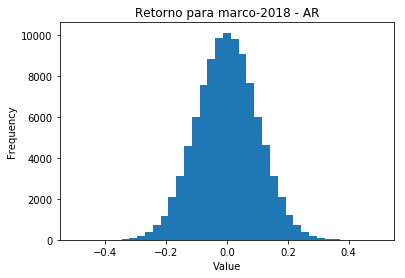

In [29]:
AR_sample = lambda r_t, n: mu*(1-phi) + phi*r_t + 0.1*np.random.randn(n) # amostragem
AR = lambda r_t: mu*(1-phi) + phi*r_t + 0                                # valor esperado

r_fev = (p_fev/p_jan) - 1             # retorno de fevereiro
r_mar_samp = AR_sample(r_fev, 100000) # amostragem dos possiveis retornos
r_mar_mean = np.mean(r_mar_samp)      # media das amostras
r_mar_exp = AR(r_fev)                 # valor esperado dos possiveis retornos (E[eps_{t+1}]=0)

p_mar = p_fev * (1 + r_mar_exp) # valor em marco
p_abr = p_mar * (1 + AR(r_mar_exp)) # valor em abril (utilizando valor esperado de eps_{t+1}: 0)

print('\n-------------------------------------------------------------------------')
print('Media das amostragens do retorno em marco pelo modelo AR: ' + str(r_mar_mean))
print('Valor esperado do retorno em marco pelo modelo AR: ' + str(r_mar_exp))
print('Valor esperado do IBOV em marco pelo modelo AR: ' + str(p_mar))
print('Valor esperado do IBOV em abril pelo modelo AR: ' + str(p_abr))
print('-------------------------------------------------------------------------\n')

plt.hist(r_mar_samp, np.linspace(-0.5,0.5,40))
plt.title("Retorno para marco-2018 - AR")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

### b. Utilizando o modelo MA(1), quais as previsoes de retorno e valor do indice IBOV para Marco e Abril 2018?


-------------------------------------------------------------------------
Media das amostragens do retorno em marco pelo modelo MA: -0.003295249637672324
Valor esperado do retorno em marco pelo modelo MA: -0.0034979893872
Valor esperado do IBOV em marco pelo modelo MA: 85055.03401304068
Valor esperado do IBOV em abril pelo modelo MA: 85055.03401304068
-------------------------------------------------------------------------



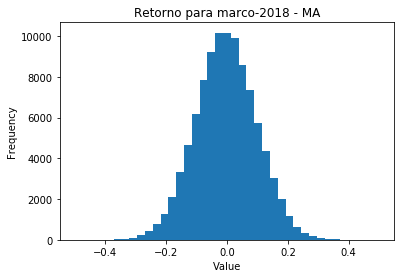

In [30]:
MA_sample = lambda eps_t, n: mu + theta*eps_t + 0.1*np.random.randn(n) # amostragem
MA = lambda eps_t: mu + theta*eps_t + 0                            # valor esperado

r_fev = (p_fev/p_jan) - 1
r_mar_samp = MA_sample(eps_fev, 100000)
r_mar_mean = np.mean(r_mar_samp)
r_mar_exp = MA(eps_fev)

p_mar = p_fev * (1 + r_mar_exp) # valor em marco
p_abr = p_mar * (1 + mu)        # valor em abril (utilizando valor esperado de eps_{t+1}: 0)

print('\n-------------------------------------------------------------------------')
print('Media das amostragens do retorno em marco pelo modelo MA: ' + str(r_mar_mean))
print('Valor esperado do retorno em marco pelo modelo MA: ' + str(r_mar_exp))
print('Valor esperado do IBOV em marco pelo modelo MA: ' + str(p_mar))
print('Valor esperado do IBOV em abril pelo modelo MA: ' + str(p_abr))
print('-------------------------------------------------------------------------\n')

plt.hist(r_mar_samp, np.linspace(-0.5,0.5,40))
plt.title("Retorno para marco-2018 - MA")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

### c. Sabendo que o valor ao final de Marco foi de 85377.79, quais seriam as previsoes atualizadas de retorno e valor em Abril 2018?

In [31]:
p_mar = 85377.79

r_mar = (p_mar/p_fev) - 1     # retorno de marco
eps_mar = r_mar - MA(eps_fev) # atualiza eps_t para o shock de marco

r_abr_ar = AR(r_mar)              # retorno esperado para abril pelo modelo AR
r_abr_ma = MA(eps_mar)            # retorno esperado para abril pelo modelo MA
p_abr_ar = p_mar * (1 + r_abr_ar) # preco esperado para abril pelo modelo AR
p_abr_ma = p_mar * (1 + r_abr_ma) # preco esperado para abril pelo modelo MA

print('\n-------------------------------------------------------------------------')
print('Valor esperado do IBOV em abril pelo modelo AR: ' + str(p_abr_ar))
print('Valor esperado do IBOV em abril pelo modelo MA: ' + str(p_abr_ma))
print('-------------------------------------------------------------------------\n')


-------------------------------------------------------------------------
Valor esperado do IBOV em abril pelo modelo AR: 85382.41593550946
Valor esperado do IBOV em abril pelo modelo MA: 85447.91866676437
-------------------------------------------------------------------------



### d. Na sua opiniao, supondo que os modelos expliquem bem retornos, vale a pena utilizar estes modelos para previsoes alem de t + 1?

#### Resposta

Na minha opinião, não. Por mais que o modelo explique bem os retornos, a variância de resultados introduzida pelos seguidos *shocks* $\varepsilon_{t+1}$ que são desconhecidos - e necessários para predizer de $t+2, t+3, ...$ - tornam a previsão mais incerta à medida que o horizonte de tempo aumenta, inclusive pelo fato de que os retornos esperados irão convergir para a média (*mean reversion*). 

# <span style='color:darkmagenta'>Questao 6.</span>

### Vamos simular dois portfolios durante todo o ano de 2015. Para este exercicio, utilizaremos os precos desde o ultimo dia util de 2014 ate o ultimo dia util de 2015. Voce deve tambem eliminar as acoes que possuem algum preco invalido (zero) durante este periodo (ver documento com instrucoes).

In [32]:
df_q6 = df_diario.copy() # copia dataframe

df_q6 = df_q6['2014-12-30':'2016-01-01'] # seleciona intervalo de tempo
print(df_q6.columns.values[(df_q6.count() < df_q6.shape[0])]) # acoes que tiveram dias com precos invalidos
df_q6 = df_q6.dropna(axis=1, how='any') # elimina colunas com dias de preco invalido

df_q6 = df_q6.drop(columns=['IBOV','BOVA11'], axis=1) # remove IBOV e BOVA11

df_q6.tail()

['SAPR11' 'SUZB3']


,ABEV3,BVMF3,BBDC3,BBAS3,SANB11,BBSE3,BRML3,BBDC4,BRAP4,BRKM5,...,RADL3,RAIL3,SMLS3,VIVT4,TIMP3,TAEE11,UGPA3,USIM5,VALE3,VVAR11
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-22,16.79,10.54,16.00,13.80,13.28,21.04,7.59,14.57,4.64,24.83,...,34.35,6.05,34.38,33.04,6.63,13.20,1.48,11.81,3.29,14.75
2015-12-23,17.02,10.49,16.19,13.66,13.62,21.35,7.67,14.68,4.89,25.32,...,35.47,6.13,33.39,33.62,6.74,13.41,1.52,12.44,3.28,14.82
2015-12-28,16.97,10.36,16.31,13.78,13.87,20.95,7.70,14.82,4.60,25.68,...,36.02,6.07,34.05,33.03,6.64,13.39,1.55,11.90,3.24,15.02
2015-12-29,17.02,10.38,16.29,13.61,13.77,20.73,7.60,14.90,4.62,25.27,...,35.57,6.32,33.88,32.79,6.53,13.39,1.52,11.97,3.28,14.85
2015-12-30,16.70,10.34,15.60,13.56,13.74,20.92,7.39,14.59,4.67,24.16,...,34.82,6.24,34.78,32.13,6.60,13.51,1.52,12.26,3.25,14.25


### a. Considere que ao final de 2014, voce dividiu RS10000 igualmente entre todas as acoes do indice iBovespa (BOVA11 nao esta incluso aqui pois nao e um componente do indice). Como as variacoes de preco de cada componente do portfolio sao desiguais, no dia seguinte as proporcoes podem nao ser mais igualmente distribuidas. Considere entao que durante todos os dias do ano, voce rebalanceou o portfolio de forma a voltar a ficar com pesos iguais - ignore possiveis custos de transacao ao fazer estes rebalanceamentos. 

### Qual o valor final do portfolio no ultimo dia de 2015? Qual o retorno diario medio e desvio padrao dos retornos diarios deste portfolio?

In [33]:
# Calcula o retorno de cada dia do portfolio
r_ind_dia = pd.DataFrame(data = np.divide(df_q6.iloc[1:].values, df_q6.iloc[:-1].values) - 1,
                         index = df_q6.index[1:],
                         columns = df_q6.columns
                        )
r_tot_dia = r_ind_dia.mean(axis=1) + 1 # retorno simples total diario do portfolio

In [35]:
# Reposta ao item 1
print('Valor do portfolio no ultimo dia util de 2015: R${:.2f}'.format(10000*r_tot_dia.prod()))
# print(scs.mstats.gmean(r_tot_dia.values)**246)       # Validacao I: media geometrica dos retornos
# print(np.exp(np.mean(np.log(r_tot_dia.values))*246)) # Validacao II: produto dos retornos logaritmicos

# Resposta ao item 2
print('Retorno diario medio (aritmetico): {:.3f}%'.format(100*(r_tot_dia.mean()-1)))
print('Retorno diario medio (geometrico): {:.3f}%'.format(100*(scs.mstats.gmean(r_tot_dia)-1)))

# Resposta ao item 3
print('Desvio padrao dos retornos diarios: {:.3f}%'.format(100*(r_tot_dia.values.std())))

Valor do portfolio no ultimo dia util de 2015: R$8397.05
Retorno diario medio (aritmetico): -0.061%
Retorno diario medio (geometrico): -0.071%
Desvio padrao dos retornos diarios: 1.397%


### b. Caso voce tivesse investido todo o dinheiro no ativo BOVA11, qual teria sido o valor ao final de 2015? E o retorno medio diario / desvio padrao? Qual a correlacao entre os retornos destes dois portfolios?

In [36]:
r_bova11_tot = df_diario.loc['2015-12-30','BOVA11']/df_diario.loc['2014-12-30','BOVA11'] # retorno total do BOVA11

print('Valor do portfolio no ultimo dia util de 2015: R${:.2f}'.format(10000*r_bova11_tot))

Valor do portfolio no ultimo dia util de 2015: R$8679.44


In [37]:
r_bova11_dia = pd.Series(data = df_diario.loc['2015-01-02':'2015-12-30','BOVA11'].values / \
                                df_diario.loc['2014-12-30':'2015-12-29','BOVA11'].values,
                         index = df_q6.index[1:]
                        ) # retorno total diario do BOVA11
    
print('Retorno diario medio (geometrico): {:.3f}%'.format(100*(scs.mstats.gmean(r_bova11_dia)-1)))
print('Desvio padrao dos retornos diarios: {:.3f}%'.format(100*(r_bova11_dia.std())))

Retorno diario medio (geometrico): -0.058%
Desvio padrao dos retornos diarios: 1.475%


In [43]:
print('Correlacao entre os dois portfolios: {}'.format(r_bova11_dia.corr(r_tot_dia, method='pearson')))

Correlacao entre os dois portfolios: 0.9449456399018749


### c. Agora considere um portfolio mais complexo: voce investiu RS10000 igualmente entre todas as acoes do indice (assim como feito acima), porem decidiu cobrir (hedging) este investimento com uma posicao short em BOVA11 do mesmo tamanho (-RS10000). Todos os dias, ao rebalancear o portfolio para que voltasse a ficar igualmente distribuido, voce tambem atualizou o tamanho da posicao short para que tenha sempre o mesmo valor da posicao long. Alem disso, ao vender as acoes alugadas BOVA11 no mercado, voce investiu o dinheiro recebido em um fundo de renda fixa que rende 0.02685% ao dia, um valor que se composto renderia aproximadamente 7% ao ano.

### Qual o valor final, retorno diario e desvio padrao deste portfolio? Quais sao os coeficientes de correlacao com os portfolios das letras a. e b.?

##### Referencias
- https://www.investopedia.com/terms/s/shortselling.asp
- https://www.investopedia.com/terms/s/shortsale.asp

In [39]:
# O portfolio e' composto por 2 retornos:
# Retorno 1/2: retorno das acoes - similar ao portfolio 1
r_acoes = np.prod(r_tot_dia) 

# Retorno 2/2: saldo do shorting investido em renda fixa
val_dia = pd.Series(10000, index=[pd.to_datetime('2014-12-30')]).append(r_tot_dia) # inclui o valor inicial (10000)
val_dia = val_dia.cumprod()                              # valor diario da posicao long
saldo_short = pd.Series(data=0.0, index=val_dia.index)   # valor acumulado da posicao short
tx_renda_fixa = 0.0002685                                # taxa de retorno do fundo de renda fixa
val_bova = df_diario.loc['2014-12-30','BOVA11']          # valor inicial das acoes do BOVA11
n_papeis = 10000/val_bova                                # primeira posicao short
for i in range(1,len(val_dia)):
    hoje = val_dia.index[i]
    ontem = val_dia.index[i-1]                                   # dia de ontem
    val_bova = df_diario.loc[hoje,'BOVA11']                      # valor das acoes do BOVA11 de hoje
    saldo_short[hoje] = saldo_short[ontem] + (val_dia[ontem] - (n_papeis*val_bova)) # fecha a posicao short
    saldo_short[hoje] += max(saldo_short[hoje],0)*tx_renda_fixa  # caso o saldo seja positivo, incide juros sobre eles
    n_papeis = val_dia[hoje]/val_bova                            # novo numero de papeis para cobrir a posicao long
    
val_port3 = val_dia + saldo_short
r_port3 = pd.Series(data = val_port3.values[1:]/val_port3.values[:-1], index=val_port3.index[1:])

In [40]:
print('Valor do portfolio no ultimo dia util de 2015: R${:.2f}'.format(val_port3.iloc[-1]))
print('Retorno diario medio (geometrico): {:.3f}%'.format(100*(scs.mstats.gmean(r_port3)-1)))
print('Desvio padrao dos retornos diarios: {:.3f}%'.format(100*(r_port3.std())))

Valor do portfolio no ultimo dia util de 2015: R$9671.34
Retorno diario medio (geometrico): -0.014%
Desvio padrao dos retornos diarios: 0.476%


In [41]:
print('Correlacao entre os portfolios 1 e 3: {}'.format(r_port3.corr(r_tot_dia, method='pearson')))
print('Correlacao entre os portfolios 2 e 3: {}'.format(r_port3.corr(r_bova11_dia, method='pearson')))

Correlacao entre os portfolios 1 e 3: 0.010951800717390854
Correlacao entre os portfolios 2 e 3: -0.31612798067688097


#### Conclusão

Devido à posição short, o portfólio ficou bastante mais protegido contra as quedas que ocorreram em 2015. Além disso, esta estratégia "descorrelaciona" seus retornos daqueles dos portfólios anteriores.